<a href="https://colab.research.google.com/github/IbrahimAdey/Datascience/blob/main/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('Bank_Churn.csv', sep=",")
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.shape

(10000, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [10]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df = data.drop(['CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.drop_duplicates(inplace=True)

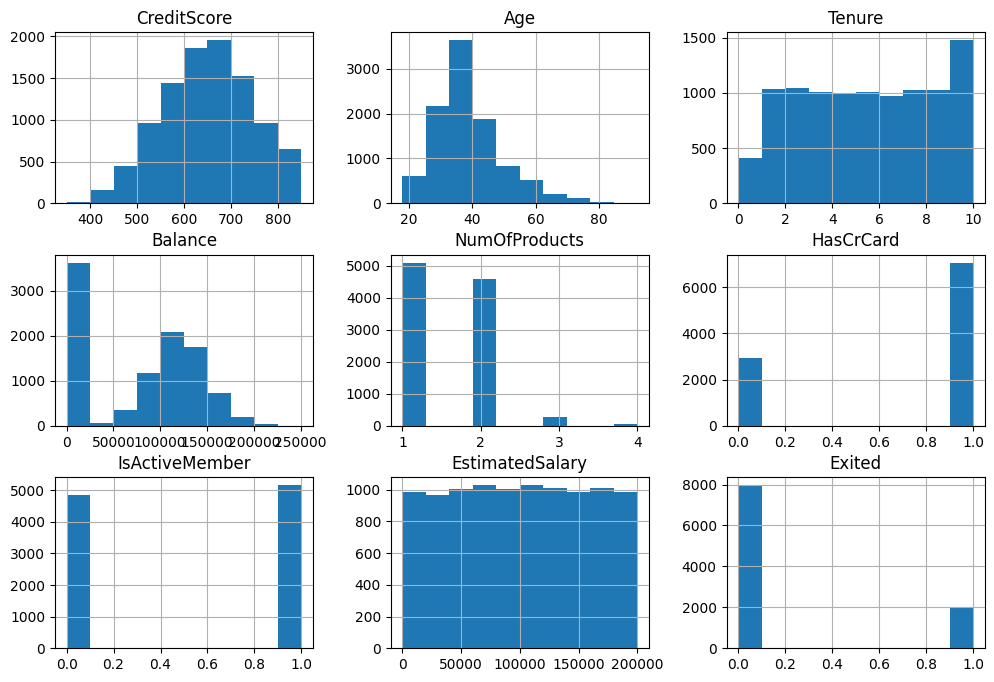

In [13]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(12,8))
plt.show()

In [14]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [15]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape

(8000, 10)

In [18]:
from math import e

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [19]:
cat_features

Index(['Geography', 'Gender'], dtype='object')

In [20]:
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=
     [('cat', OneHotEncoder(), cat_features),
     ('num', StandardScaler(), num_features)]
)

preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 Index(['Geography', 'Gender'], dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object'))])

In [22]:
from numpy.random.mtrand import RandomState
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'Random_forest' : RandomForestClassifier(random_state = 42, n_jobs = -1),
    'Decision_tree' : DecisionTreeClassifier(random_state = 42),
    'Logistic' : LogisticRegression(random_state = 42, n_jobs = -1)
    # 'svc' : SVC(random_state=42),
    # 'Xgboost' : XGBoost(random_state=42)

}

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score, precision_score

results = {}

for name, model in models.items():
  pipeline = Pipeline(
      [('preprocessing', preprocessor),
       ('classifier', model)]
  )

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  results[name] = {
      'F1' : f1_score(y_pred, y_test),
      'recall' : recall_score(y_pred, y_test),
      'confusion_matrix' : confusion_matrix(y_pred, y_test),
      'accuracy' : accuracy_score(y_pred, y_test),
      'precision' : precision_score(y_pred, y_test)
  }
  result_df = pd.DataFrame(results).T.round(4)
  print(result_df.sort_values('F1', ascending=False))

                     F1    recall          confusion_matrix accuracy precision
Random_forest  0.574924  0.761134  [[1534, 219], [59, 188]]    0.861  0.461916
                     F1    recall           confusion_matrix accuracy  \
Random_forest  0.574924  0.761134   [[1534, 219], [59, 188]]    0.861   
Decision_tree  0.502994  0.490654  [[1375, 197], [218, 210]]   0.7925   

              precision  
Random_forest  0.461916  
Decision_tree  0.515971  
                     F1    recall           confusion_matrix accuracy  \
Random_forest  0.574924  0.761134   [[1534, 219], [59, 188]]    0.861   
Decision_tree  0.502994  0.490654  [[1375, 197], [218, 210]]   0.7925   
Logistic       0.283582  0.589147    [[1540, 331], [53, 76]]    0.808   

              precision  
Random_forest  0.461916  
Decision_tree  0.515971  
Logistic       0.186732  


In [24]:
best_model_pipeline = Pipeline(
    [('preprocessing', preprocessor),
     ('best_model', RandomForestClassifier()
     )]
)

best_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['Geography', 'Gender'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object'))])),
                ('best_model', RandomForestClassifier())])

In [25]:
import joblib
from pathlib import Path

MODEL_DIR = Path("model")
MODEL_DIR.mkdir(exist_ok=True)
joblib.dump(best_model_pipeline, 'model/customer_churn_model')


['model/customer_churn_model']